In [16]:
using Images
using Interact
using ProfileView

INFO: Precompiling module ProfileView...
INFO: Precompiling module ProfileViewSVG...


In [2]:
# This is a utility function (you do not need to understand it) 
# which overrides Ijulia's image widget so that manipulate displays with the proper width
immutable ImgFrame
    img::Image
end
Base.writemime(io::IO, m::MIME"text/html", frame::ImgFrame) = 
write(io, """<img src="data:image/png;base64,$(stringmime(MIME("image/png"), frame.img))"/>""")

writemime (generic function with 38 methods)

In [3]:
import ImageSeamReference
reload("ImageSeamReference")

In [57]:
import ImageSeam
reload("ImageSeam")

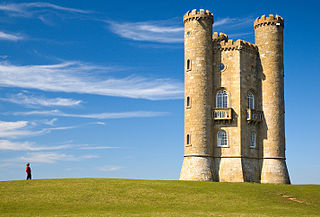

In [58]:
# Wikipedia demo
if ~isfile("320px-Broadway_tower_edit.jpg")
    run(`wget https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Broadway_tower_edit.jpg/320px-Broadway_tower_edit.jpg`)
end
img = imread("320px-Broadway_tower_edit.jpg")

In [59]:
@time A = ImageSeam.all_carvings(img)
@time A = ImageSeam.all_carvings(img)
@assert ImageSeam.verify(A)

  0.542524 seconds (158.50 k allocations: 51.273 MB, 1.06% gc time)
  0.391307 seconds (6.80 k allocations: 44.881 MB, 3.62% gc time)


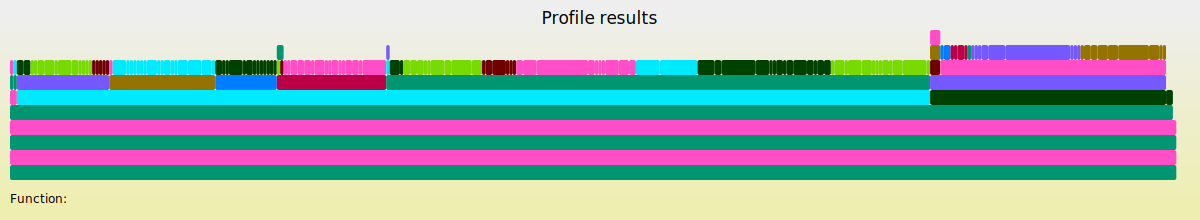

In [60]:
Profile.clear()
@profile A = ImageSeam.all_carvings(img)
ProfileView.view(combine=true)

Interact.Slider{Int64}([Reactive.Input{Int64}] 320,"",320,2:320)

ImgFrame(RGB4 Images.Image with:
  data: 320x217 Array{ColorTypes.RGB4{FixedPointNumbers.UfixedBase{UInt8,8}},2}
  properties:
    imagedescription: <suppressed>
    spatialorder:  x y
    pixelspacing:  1 1)
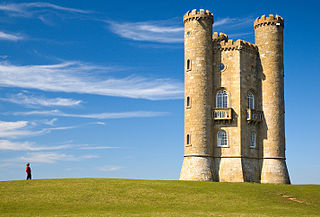

In [52]:
@manipulate for image_width=slider(2:size(img,1), value=size(img,1))
    ImgFrame(A[1+size(img,1)-image_width])
end

In [302]:
typeof(A[1])

Images.Image{ColorTypes.RGB4{FixedPointNumbers.UfixedBase{UInt8,8}},2,Array{ColorTypes.RGB4{FixedPointNumbers.UfixedBase{UInt8,8}},2}}

In [88]:
zeros(Float32, 1, 5)

1x5 Array{Float32,2}:
 0.0  0.0  0.0  0.0  0.0